In [1]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Nmf

import utils

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
stemmer = PorterStemmer()

In [46]:
# tdf = pd.read_csv('transcripts/transcripts.csv', index_col=0)
# sdf = pd.read_csv('transcripts/speeches.csv', index_col=0)
# tdf = pd.read_csv('transcripts/transcripts_sents.csv', index_col=0)
# sdf = pd.read_csv('transcripts/speech_sents.csv', index_col=0)
# tdf = pd.read_csv('transcripts_enhanced.csv')
# sdf = pd.read_csv('speeches_enhanced.csv')

tdf = pd.read_csv('speaker_grouped.csv')

In [5]:
sdf['tokens'] = sdf['text_enhanced'].apply(lambda x: utils.process(x, stemmer=stemmer))

In [47]:
tdf['tokens'] = tdf['content'].apply(lambda x : utils.process(x, stemmer=stemmer)) 

In [70]:
texts = tdf['tokens'].tolist() # + sdf['tokens'].tolist()

In [71]:
dictionary = Dictionary(texts)

# dictionary.filter_n_most_frequent(10)
# dictionary.compactify()
corpus = [dictionary.doc2bow(text) for text in texts]

### EVENTUALLY USE MORE SOPHISTICATED PROCEDURE TO SELECT NUMBER OF TOPICS

In [ ]:
def coherence_compare(corpus, start, stop, step):
    for i in range(start, stop, step):
        lda = LdaModel(corpus, i, id2word=dictionary, passes=1)
        cm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary)
        print(cm.get_coherence())
coherence_compare(corpus, 2, 4, 3)

In [72]:
ldamodel = LdaModel(corpus, num_topics=40, id2word=dictionary, passes=5, random_state=0, minimum_probability=0)

In [483]:
# nmf = Nmf(corpus, id2word=dictionary, num_topics=45, random_state=0, minimum_probability=0)

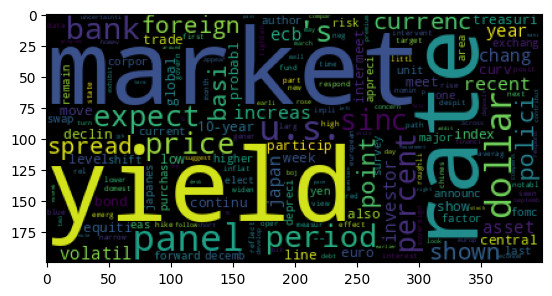

In [99]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(27, 200))))

NMF topics

44 employment

42 financial market

38 expectations

37 labor market

36 risk

35 ?

32 "term"

30 "economy"

27 ffr

26 "business"

25 interest rates

23 asset purchases?

22 "bank" balance sheets?

18 core pce inflation projections

17 forecasts

16 inflation

15 unemployment

11 ffr

9 growth

8 monetary (fiscal) policy

7 price levels

4 "data"

In [144]:
for i in range(45):
    print(nmf.show_topic(i, 10)[0:5])
    print('\n')

[("'s", 0.39649051280680975), ('let', 0.010207349234845252), ('staff', 0.007546915070563938), ('import', 0.0074702011399165645), ('today', 0.007024655880229109)]


[('think', 0.35418546445670646), ('import', 0.013396191882474078), ('way', 0.0128590284596527), ('us', 0.012744809409308446), ('need', 0.012482601307364748)]


[("''", 0.20616806203048066), ('``', 0.20222229237210612), ('say', 0.025889784763009245), ('word', 0.015307205922765623), ('econom', 0.012183836255867641)]


[("n't", 0.2793228967599541), ('chang', 0.045245678015322886), ('know', 0.03510226291538849), ('much', 0.03436656554596637), ('realli', 0.019638795206488882)]


[('data', 0.1867119286747923), ('incom', 0.03189709775589378), ('econom', 0.020114683057510747), ('last', 0.01968342925180625), ('look', 0.01732525501695691)]


[('percent', 0.2659319236088492), ('2', 0.04824411785363075), ('3', 0.015056604495352986), ('1', 0.014498872170918484), ('gdp', 0.011337273987868669)]


[('year', 0.28164884109649896), ('next', 0.

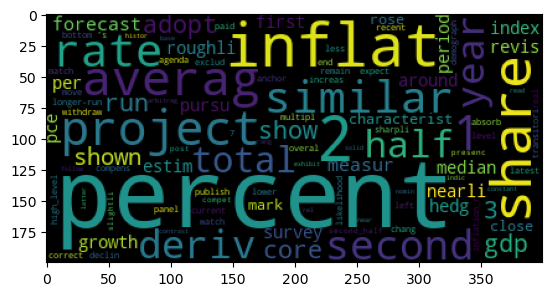

In [303]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(14, 200))))

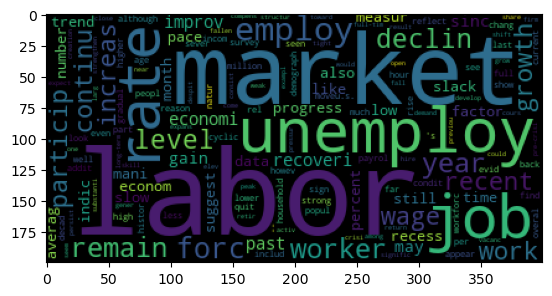

In [110]:
plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(6, 200))))

In [487]:
def get_max_topic(tokens):
    topic_probs = nmf[dictionary.doc2bow(tokens)]
    if len(topic_probs) > 0:
        max_prob = topic_probs[0][1]
        max_ind = 0
        for i in range(1, len(topic_probs)):
            if topic_probs[i][1] > max_prob:
                max_prob = topic_probs[i][1]
                max_ind = i
        return pd.Series([topic_probs[max_ind][0], max_prob], index=['topic', 'prob'])
    return pd.Series([None, None], index=['topic', 'prob'])

get_max_topic(tdf.loc[205].tokens)

[(0, 0.22982931844332238), (3, 0.006064672707542939), (4, 0.00411476679532423), (5, 0.31380085446080264), (6, 0.10521444370169349), (9, 0.0007210869601999902), (18, 0.21149594909681899), (19, 0.014213836399375282), (20, 0.003915786899366396), (23, 0.0019623029518893373), (25, 0.029323307179473786), (32, 0.0017333808246226285), (33, 0.06890445417181804), (35, 0.006816483192542763), (41, 0.0018893562152070187)]


topic    5.000000
prob     0.313801
dtype: float64

In [18]:
def get_all_topics(tokens):
    topic_probs = ldamodel[dictionary.doc2bow(tokens)]
    result = [0] * 45
    for topic, prob in topic_probs:
        result[topic] = prob
    return pd.Series(result)

In [34]:
tdf.loc[46266, 'tokens']

['think',
 'govern',
 'fund',
 'still',
 'replac',
 'overnight',
 'rrp',
 'around',
 'quarter-end']

In [35]:
get_all_topics(tdf.loc[46266, 'tokens'])

0     0.002222
1     0.002222
2     0.002222
3     0.002222
4     0.649241
5     0.002222
6     0.002222
7     0.002222
8     0.002222
9     0.255193
10    0.002222
11    0.002222
12    0.002222
13    0.002222
14    0.002222
15    0.002222
16    0.002222
17    0.002222
18    0.002222
19    0.002222
20    0.002222
21    0.002222
22    0.002222
23    0.002222
24    0.002222
25    0.002222
26    0.002222
27    0.002222
28    0.002222
29    0.002222
30    0.002222
31    0.002222
32    0.002222
33    0.002222
34    0.002222
35    0.002222
36    0.002222
37    0.002222
38    0.002222
39    0.002222
40    0.002222
41    0.002222
42    0.002222
43    0.002222
44    0.002222
dtype: float32

In [56]:
tdf[[f'tprob_{i}' for i in range(45)]] = tdf.tokens.apply(get_all_topics)

In [68]:
tdf[tdf['tprob_2'] > 0.2]['content'][168]

'That leaves you as wanting to keep this?'

<Axes: xlabel='date'>

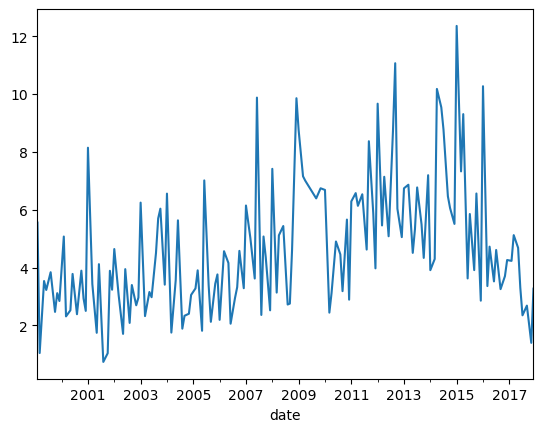

In [587]:
mtdf = tdf[tdf['type'] == 'meeting'] 
mtdf[['tprob_35', 'date']].groupby(pd.PeriodIndex(mtdf['date'], freq='M'))['tprob_35'].sum().plot()

In [472]:
tdf_sample = tdf.sample(5000)

In [473]:
tdf_sample[['topic','topic_prob']] = tdf_sample.tokens.apply(get_topics)

9 prices, somewhat inflation

In [479]:
tdf_sample[tdf_sample['topic'] == 5][['content', 'topic_prob']].to_csv('topictest.csv')

In [201]:
sdf[['topic', 'topic_prob']] = sdf.tokens.apply(get_topics)

In [202]:
tdf[['topic', 'topic_prob']] = tdf.tokens.apply(get_topics)

In [ ]:
for item in sdf[sdf['topic'] == 6.0]['text'][:25]:
    print(item)

In [ ]:
for item in tdf[tdf['topic'] == 6.0]['condensed'][:25]:
    print(item)

In [ ]:
for item in tdf[tdf['topic'] == 3.0]['condensed'][:25]:
    print(item)

In [ ]:
for item in sdf[sdf['topic'] == 3.0]['text'][:25]:
    print(item)

In [209]:
path = "Loughran-McDonald_MasterDictionary_1993-2021.csv"

lm_df = pd.read_csv(path)

lm = {}

for i, row in lm_df.iterrows():
    # print(row)
    word = str(row['Word']).lower()
    if row['Negative'] != 0:
        lm[word] = -1
    if row['Positive'] != 0:
        lm[word] = 1

In [219]:
def sentscore(string):
    # tokens = process(string)
    total = 0
    tokens = [token.lower() for token in word_tokenize(str(string))]
    numtokens = len(tokens) if len(tokens) > 0 else 1
    for token in tokens:
        # print(token)
        if token in lm:
            total += lm[token]
            # print(token)
            # print(lm[token])
    # print(total)
    # print(tokens)
    return total

In [220]:
tdf['lm_sent'] = tdf['content'].apply(sentscore)

In [221]:
sdf['lm_sent'] = sdf['text'].apply(sentscore)

In [225]:
speech_infl = sdf[sdf['topic'] == 9][['date', 'lm_sent']]
speech_infl['date'] = pd.to_datetime(speech_infl['date'])
sinfdf = speech_infl.groupby(pd.PeriodIndex(speech_infl['date'], freq='M'))['lm_sent'].sum()

In [229]:
transcript_infl = tdf[tdf['topic'] == 9][['date', 'lm_sent']]
transcript_infl['date'] = pd.to_datetime(transcript_infl['date'])
tinfdf = transcript_infl.groupby(pd.PeriodIndex(transcript_infl['date'], freq='M'))['lm_sent'].sum()

In [236]:
speech_grow = sdf[sdf['topic'] == 37][['date', 'lm_sent']]
speech_grow['date'] = pd.to_datetime(speech_grow['date'])
sgrowdf = speech_grow.groupby(pd.PeriodIndex(speech_grow['date'], freq='M'))['lm_sent'].sum()

In [237]:
transcript_grow = tdf[tdf['topic'] == 37][['date', 'lm_sent']]
transcript_grow['date'] = pd.to_datetime(transcript_grow['date'])
tgrowdf = transcript_grow.groupby(pd.PeriodIndex(transcript_grow['date'], freq='M'))['lm_sent'].sum()

<Axes: xlabel='date'>

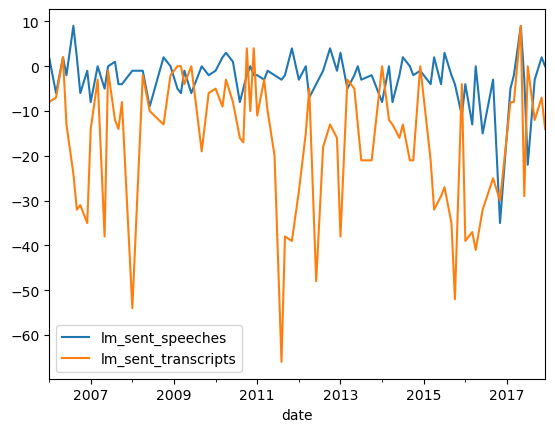

In [227]:
merged_inf = pd.merge(sinfdf, tinfdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_inf.plot()
# merged_inf

<Axes: xlabel='date'>

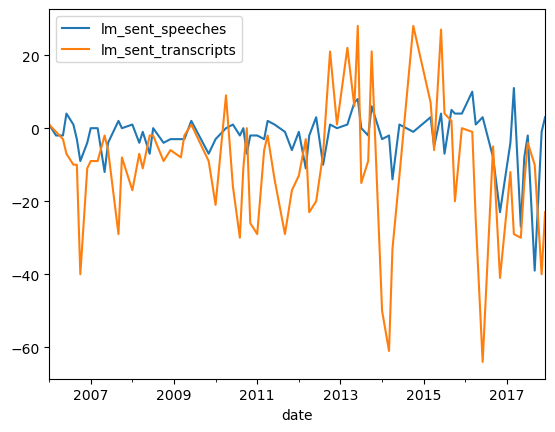

In [238]:
merged_grow = pd.merge(sgrowdf, tgrowdf, on='date', suffixes=['_speeches', '_transcripts'])
merged_grow.plot()